# Drive Authentication

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Processing

In [2]:
import pandas as pd
import numpy as np
import glob

In [3]:
# Obtained by looking at data
START_DATE = '2013-01-02'
END_DATE = '2022-02-28'
NUM_DATES = 2305

# PYPL start date is 2015-07-06 so we will ignore it, other stocks are outliers
ignored_symbols = ['PYPL', 'AMZN', 'GOOG', 'GOOGL', 'TSLA']

csvs = glob.glob('/content/drive/My Drive/CS 7641/stock_data/combined_data/*.csv')
data = pd.DataFrame(pd.read_csv(csvs[0])['Date'])

for csv in csvs:
  symbol = csv[csv.rindex('/') + 1:-4]
  if symbol not in ignored_symbols:
    stock_data = pd.read_csv(csv)['Adj Close']
    data[symbol] = stock_data

data = data.set_index('Date')
data.head()

,MA,BAC,ABT,XOM,CVX,NEE,ABBV,MCD,JNJ,DHR,...,LIN,CRM,AVGO,AAPL,LOW,LLY,TMO,WMT,NFLX,MRK
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,48.317673,10.409261,26.871374,59.725407,74.843666,13.768790,23.985439,69.664696,55.023228,41.699352,...,93.060379,42.792500,25.562170,16.939112,30.915405,39.171574,62.835106,56.325932,13.144286,29.646122
2013-01-03,48.386795,10.348694,27.894245,59.617706,74.524994,13.770737,23.787380,70.058922,54.945568,42.098351,...,93.060379,42.177502,25.695705,16.725309,30.624958,39.337723,62.641769,55.967995,13.798571,30.356083
2013-01-04,48.384903,10.478484,27.726566,59.893738,74.918243,13.839075,23.486874,69.455971,55.574718,42.141872,...,93.688583,42.402500,25.530745,16.259424,30.394314,40.793507,63.192787,56.179501,13.711429,30.097921
2013-01-07,49.223404,10.461181,27.952936,59.200264,74.409752,13.774638,23.534687,70.275398,55.458225,42.141872,...,93.481934,42.244999,25.389341,16.163782,29.693823,40.738121,63.685806,55.642593,14.171429,30.205488
2013-01-08,49.061401,10.365998,27.961323,59.570568,74.077538,13.921079,23.022469,70.298576,55.465969,41.844440,...,94.134995,42.492500,25.216515,16.207279,29.710913,41.046688,63.289440,55.797169,13.880000,30.248520


# Data Visualization

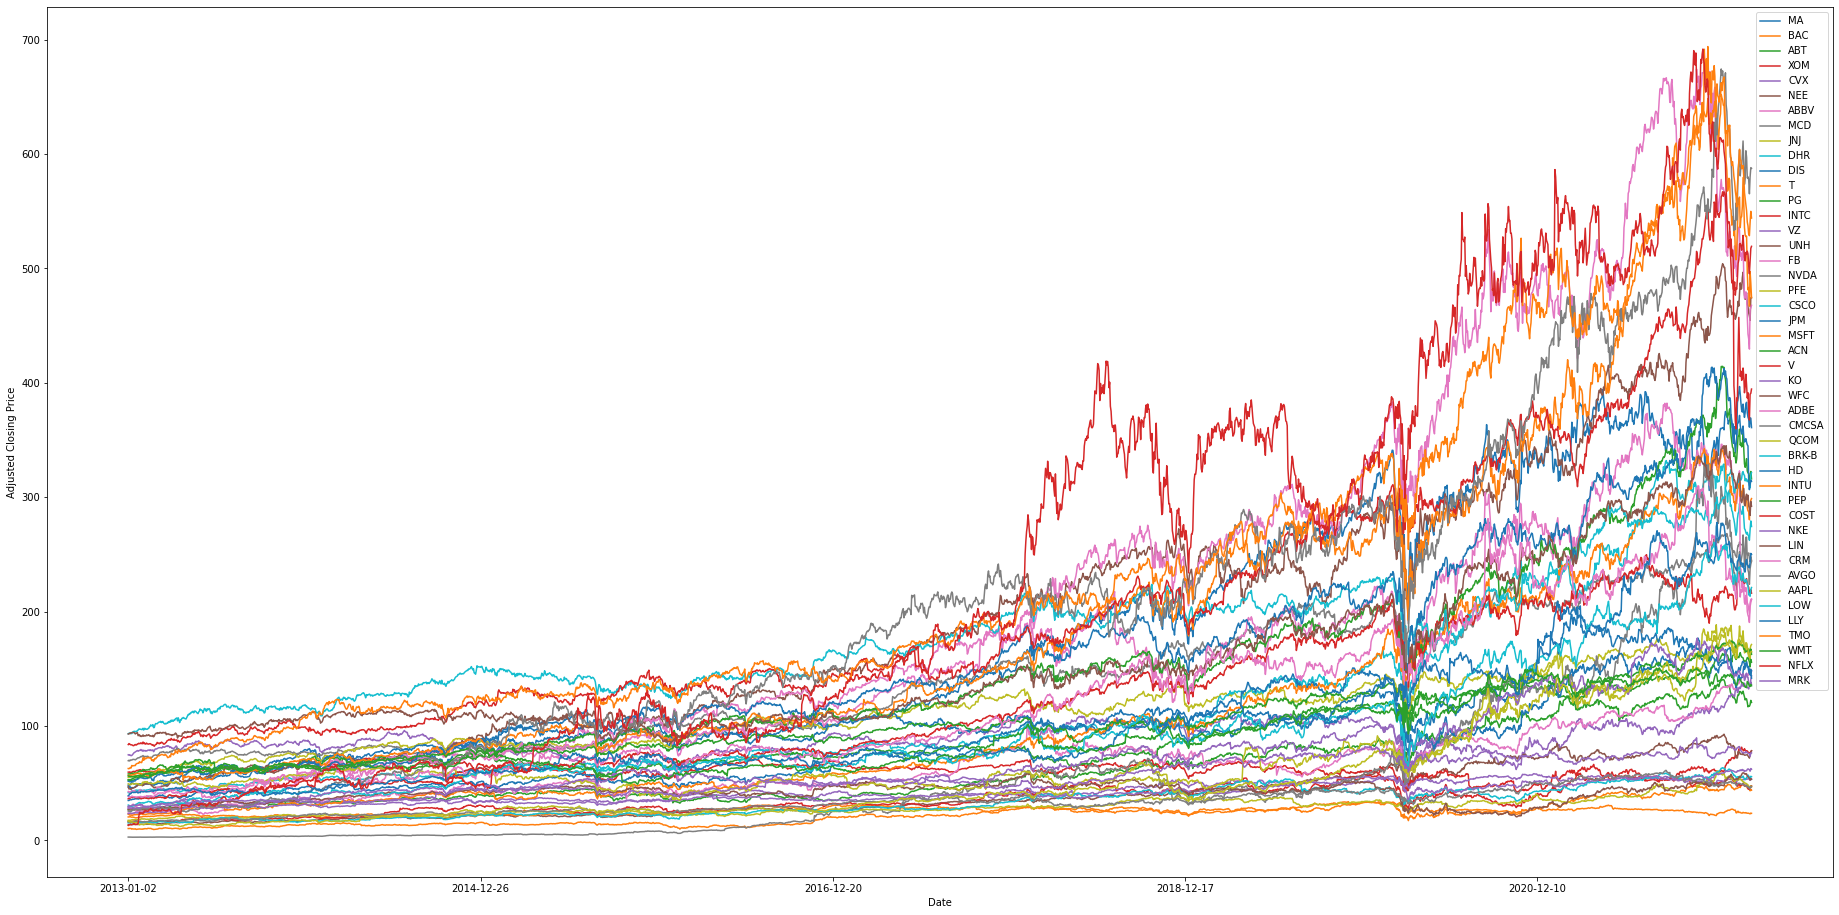

In [4]:
data.plot(y=data.columns, ylabel='Adjusted Closing Price', figsize=(32, 16))

# Elbow Method

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

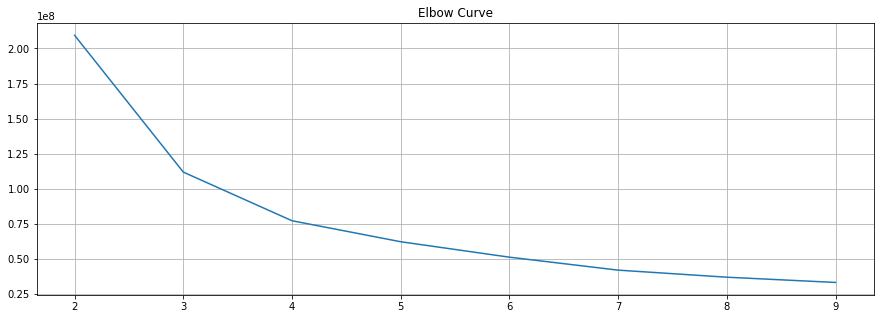

In [6]:
cluster_range = range(2, 10)
distortions = []
for k in cluster_range:
  kmeans = KMeans(n_clusters=k).fit(data.T)
  distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(cluster_range, distortions)
plt.grid(True)
plt.title('Elbow Curve')
plt.show()

# K-Means Clustering (k=4)

In [7]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=0)
y_pred = kmeans.fit_predict(data.T)

for k in range(K):
  print(f'Stocks in cluster {k}:')
  print(np.array(data.columns)[np.argwhere(y_pred == k)])

Stocks in cluster 0:
[['BAC']
 ['XOM']
 ['NEE']
 ['T']
 ['INTC']
 ['VZ']
 ['PFE']
 ['CSCO']
 ['KO']
 ['WFC']
 ['CMCSA']
 ['MRK']]
Stocks in cluster 1:
[['MA']
 ['MCD']
 ['DHR']
 ['FB']
 ['MSFT']
 ['ACN']
 ['V']
 ['BRK-B']
 ['HD']
 ['LIN']
 ['CRM']]
Stocks in cluster 2:
[['UNH']
 ['ADBE']
 ['INTU']
 ['COST']
 ['AVGO']
 ['TMO']
 ['NFLX']]
Stocks in cluster 3:
[['ABT']
 ['CVX']
 ['ABBV']
 ['JNJ']
 ['DIS']
 ['PG']
 ['NVDA']
 ['JPM']
 ['QCOM']
 ['PEP']
 ['NKE']
 ['AAPL']
 ['LOW']
 ['LLY']
 ['WMT']]


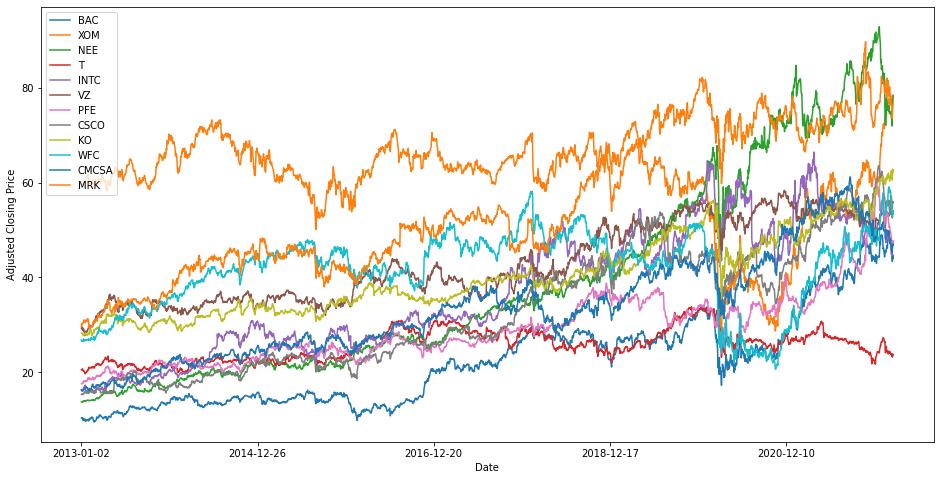

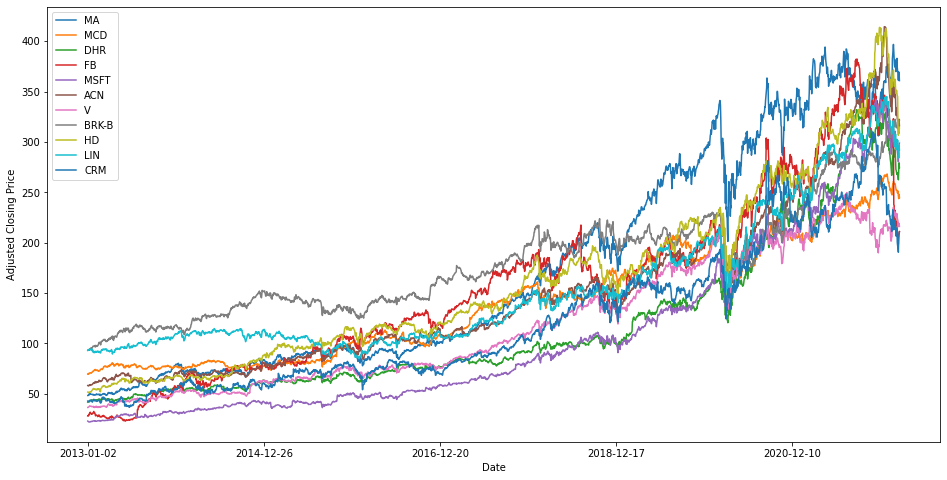

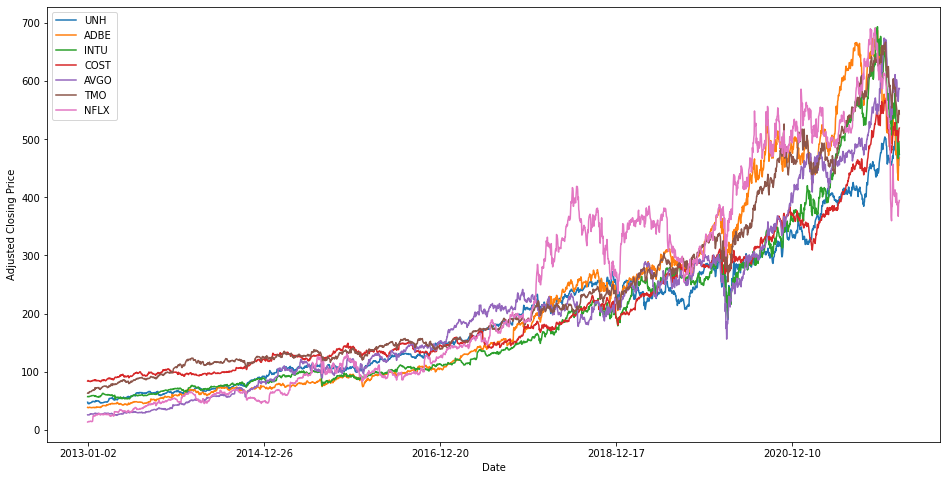

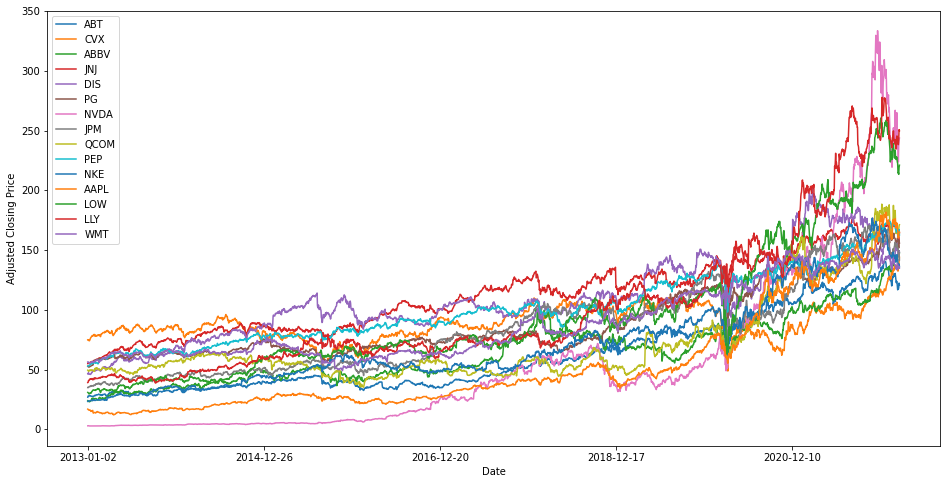

In [31]:
for k in range(K):
  cluster = data[np.array(data.columns)[np.argwhere(y_pred == k)].flatten()]
  cluster.plot(y=cluster.columns, ylabel='Adjusted Closing Price', figsize=(16, 8))

# DTW Elbow Method

In [8]:
!pip install tslearn -q
from tslearn.clustering import TimeSeriesKMeans

     |████████████████████████████████| 793 kB 2.7 MB/s 


2 363353.28922021325
3 156583.11875517527
4 71163.60243740704
5 64193.284922746214
6 61472.8812126871
7 51333.985265568495
8 44192.330305595504
9 45093.923181482205


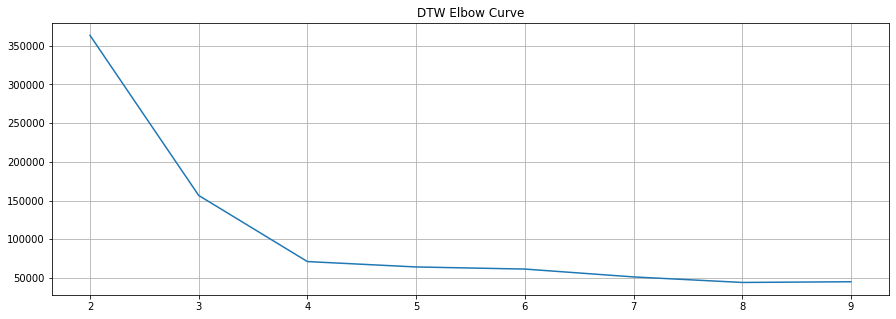

In [15]:
cluster_range = range(2, 10)
distortions = []
for k in cluster_range:
  kmeans = TimeSeriesKMeans(n_clusters=k, metric='dtw', max_iter=5, max_iter_barycenter=5, n_jobs=-1)
  kmeans.fit(data.T)
  print(k, kmeans.inertia_)
  distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(cluster_range, distortions)
plt.grid(True)
plt.title('DTW Elbow Curve')
plt.show()

# DTW K-Means (k=4)

In [16]:
DTW_K = 4
dtw_kmeans = TimeSeriesKMeans(n_clusters=DTW_K, metric='dtw', max_iter=5, max_iter_barycenter=5, n_jobs=-1, random_state=0)
y_dtw_pred = dtw_kmeans.fit_predict(data.T)

In [17]:
for k in range(DTW_K):
  print(f'Stocks in cluster {k}:')
  print(np.array(data.columns)[np.argwhere(y_dtw_pred == k)])

Stocks in cluster 0:
[['BAC']
 ['XOM']
 ['NEE']
 ['T']
 ['INTC']
 ['VZ']
 ['PFE']
 ['CSCO']
 ['KO']
 ['WFC']
 ['CMCSA']
 ['MRK']]
Stocks in cluster 1:
[['UNH']
 ['ADBE']
 ['INTU']
 ['COST']
 ['AVGO']
 ['TMO']
 ['NFLX']]
Stocks in cluster 2:
[['MA']
 ['MCD']
 ['DHR']
 ['FB']
 ['MSFT']
 ['ACN']
 ['BRK-B']
 ['HD']
 ['LIN']
 ['CRM']
 ['LLY']]
Stocks in cluster 3:
[['ABT']
 ['CVX']
 ['ABBV']
 ['JNJ']
 ['DIS']
 ['PG']
 ['NVDA']
 ['JPM']
 ['V']
 ['QCOM']
 ['PEP']
 ['NKE']
 ['AAPL']
 ['LOW']
 ['WMT']]


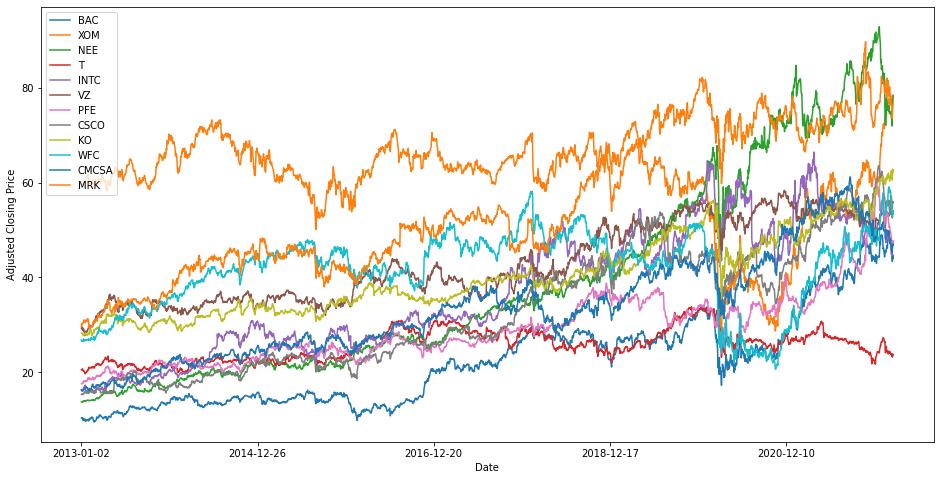

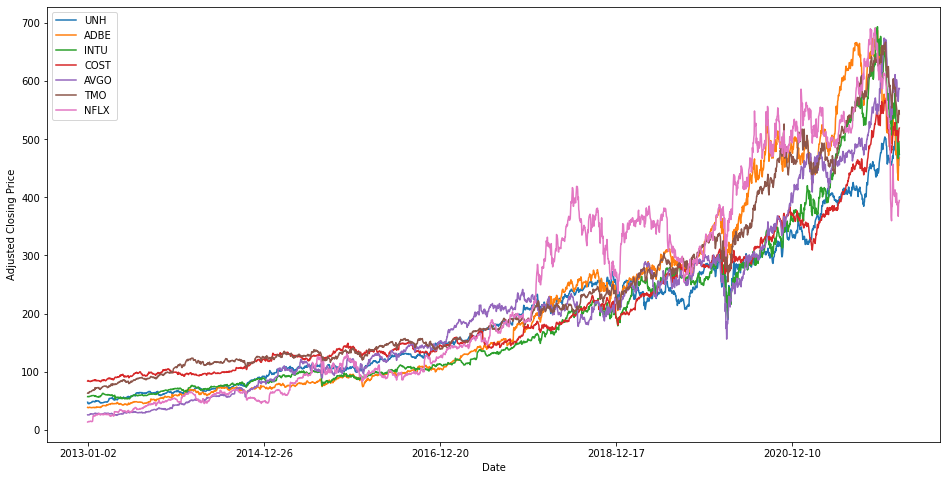

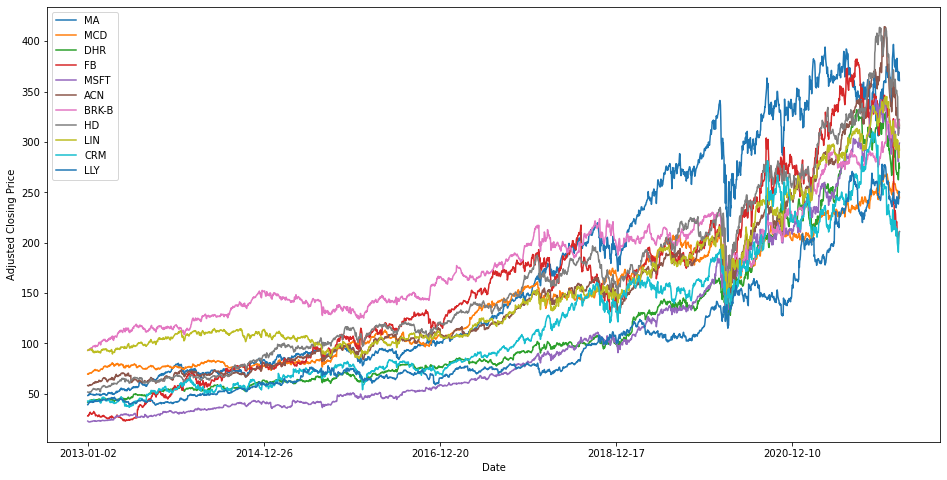

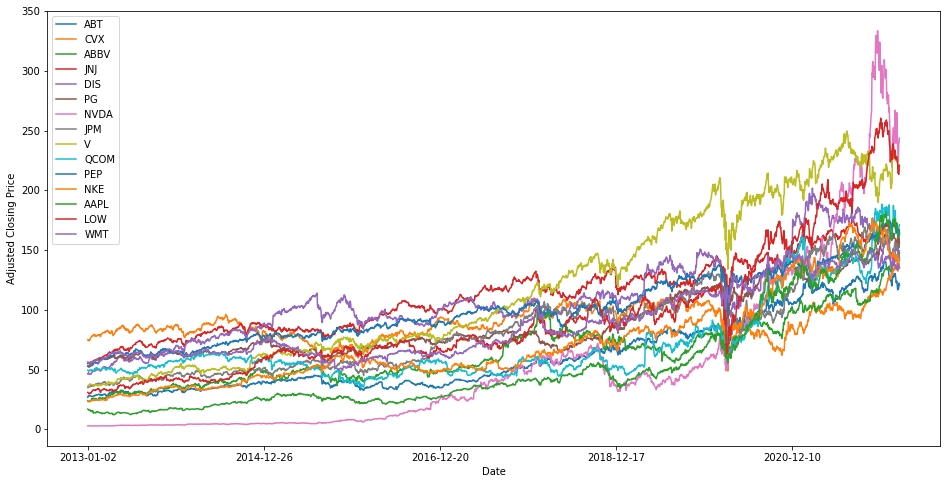

In [26]:
for k in range(DTW_K):
  cluster = data[np.array(data.columns)[np.argwhere(y_dtw_pred == k)].flatten()]
  cluster.plot(y=cluster.columns, ylabel='Adjusted Closing Price', figsize=(16, 8))

# Gaussian Mixture Model

In [45]:
from sklearn.mixture import GaussianMixture

In [46]:
Y_GMM = 4

gmm = GaussianMixture(n_components=Y_GMM, covariance_type='full')
y_gmm_pred = gmm.fit_predict(data.T)

In [47]:
for k in range(Y_GMM):
  print(f'Stocks in cluster {k}:')
  print(np.array(data.columns)[np.argwhere(y_gmm_pred == k)])

Stocks in cluster 0:
[['CVX']
 ['JNJ']
 ['DHR']
 ['DIS']
 ['PG']
 ['NVDA']
 ['JPM']
 ['MSFT']
 ['V']
 ['QCOM']
 ['PEP']
 ['NKE']
 ['CRM']
 ['LOW']
 ['LLY']
 ['WMT']]
Stocks in cluster 1:
[['UNH']
 ['ADBE']
 ['INTU']
 ['COST']
 ['AVGO']
 ['TMO']
 ['NFLX']]
Stocks in cluster 2:
[['BAC']
 ['ABT']
 ['XOM']
 ['NEE']
 ['ABBV']
 ['T']
 ['INTC']
 ['VZ']
 ['PFE']
 ['CSCO']
 ['KO']
 ['WFC']
 ['CMCSA']
 ['AAPL']
 ['MRK']]
Stocks in cluster 3:
[['MA']
 ['MCD']
 ['FB']
 ['ACN']
 ['BRK-B']
 ['HD']
 ['LIN']]


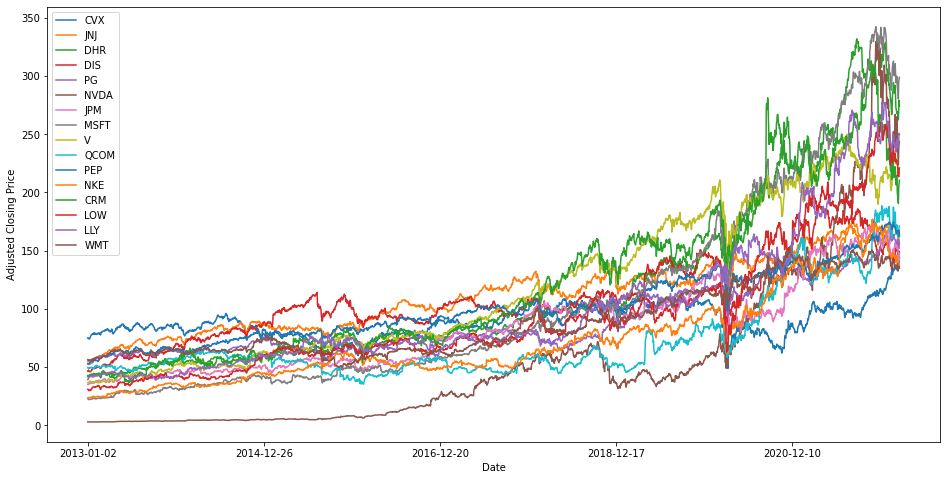

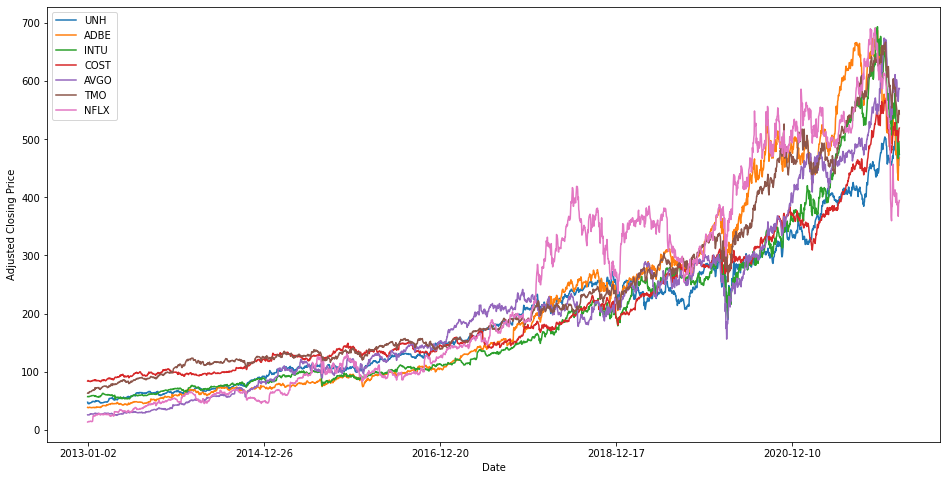

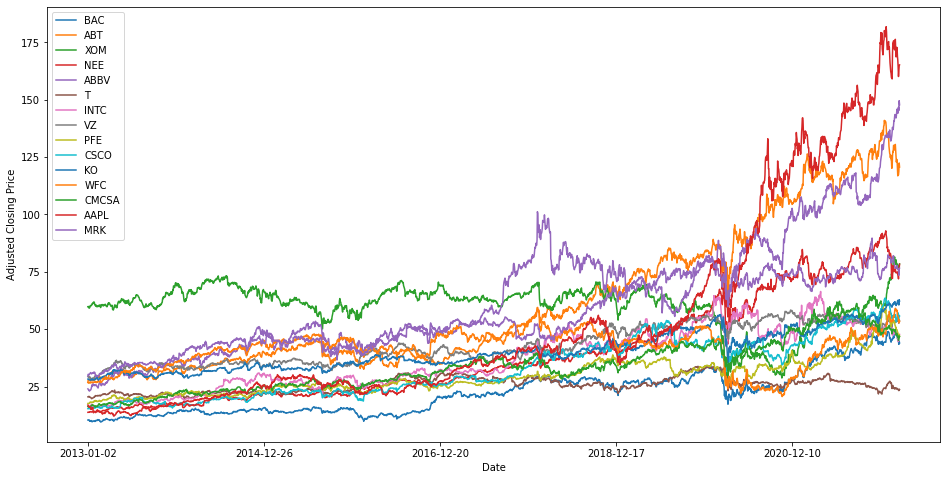

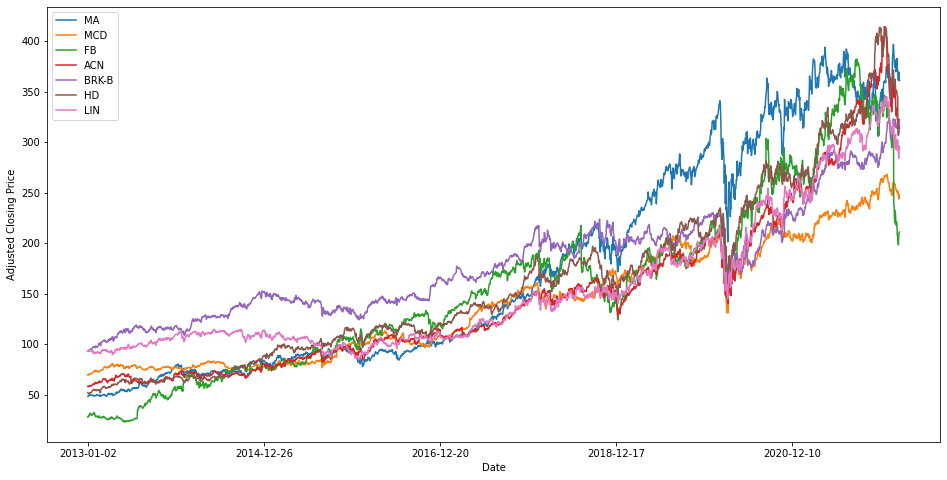

In [48]:
for k in range(Y_GMM):
  cluster = data[np.array(data.columns)[np.argwhere(y_gmm_pred == k)].flatten()]
  cluster.plot(y=cluster.columns, ylabel='Adjusted Closing Price', figsize=(16, 8))